# Bulding Linear Regression from Scratch

### Importing Libraries

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.style.use('seaborn')

### linear regression implementation.

In [2]:
class linear_regression:
    
    def __init__(self, w_intercept=True):
        """
        Performs linear regression using the direct matrix solution
        from linear algebra. Minimizes the sum of squared errors of 
        all included data points by drawing a best fit line and 
        extracting the coefficients of that line.
        ---
        KWargs:
        w_intercept: flag to choose whether to include a y-intercept
        term in the calculation or not.
        """
        self.coef_ = None
        self.intercept = w_intercept
        self.is_fit = False
        
    def add_intercept(self, X):
        """
        Adds an 'all 1's' bias term to function as the y-intercept
        """
        rows = X.shape[0]
        inter = np.ones(rows).reshape(-1,1)
        return np.hstack((X,inter))
        
    def fit(self, X, y):
        """
        Read in X (all features) and y (target) and use the Linear Algebra solution
        to extract the coefficients for Linear Regression.
        """
        X = self.convert_to_array(X)
        y = self.convert_to_array(y)
        
        if self.intercept:
            X = self.add_intercept(X)
            
        temp_xtx = np.linalg.inv(np.dot(X.T,X))
        temp_xty = np.dot(X.T,y)
        self.coef_ = np.dot(temp_xtx,temp_xty)
        self.is_fit = True
    
    def predict(self, X):
        """
        Takes in a new X value (that must be the same shape as the original X for fitting)
        and returns the predicted y value, using the coefficients from fitting.
        """
        if not self.is_fit:
            raise ValueError("You have to run the 'fit' method before using predict!")

        X = self.convert_to_array(X)
        if self.intercept:
            X = self.add_intercept(X)
        return np.dot(X,self.coef_)
   
    def pandas_to_numpy(self, x):
        """
        Checks if the input is a Dataframe or series, converts to numpy matrix for
        calculation purposes.
        ---
        Input: X (array, dataframe, or series)
        Output: X (array)
        """
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return x.as_matrix()
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x) 
    
    def handle_1d_data(self,x):
        """
        Converts 1 dimensional data into a series of rows with 1 columns
        instead of 1 row with many columns.
        """
        if x.ndim == 1:
            x = x.reshape(-1,1)
        return x
    
    def convert_to_array(self, x):
        """
        Takes in an input and converts it to a numpy array
        and then checks if it needs to be reshaped for us
        to use it properly
        """
        x = self.pandas_to_numpy(x)
        x = self.handle_1d_data(x)
        return x

    def score(self, X, y):
        """
        Uses the predict method to measure the (negative)
        mean squared error of the model.
        ---
        In: X (list or array), feature matrix; y (list or array) labels
        Out: negative mean squared error (float)
        """
        X = self.convert_to_array(X)
        y = self.convert_to_array(y)
        pred = self.predict(X)
        return -1.* np.mean((np.array(pred)-np.array(y))**2)

### Loading Data

In [3]:
df=pd.DataFrame()
df = pd.read_csv('PPC_Bag_DailySales.csv')
columns = ['Date','Quantity In Quintal']
df = pd.DataFrame(df.values,columns=columns)

In [4]:
df.head(10)

,Date,Quantity In Quintal
0,2.0,1000.000000
1,3.0,2866.666667
2,4.0,4100.000000
3,5.0,3360.000000
4,6.0,2866.666667
5,7.0,2514.285714
6,8.0,2275.000000
7,9.0,2133.333333
8,10.0,1940.000000
9,11.0,1800.000000


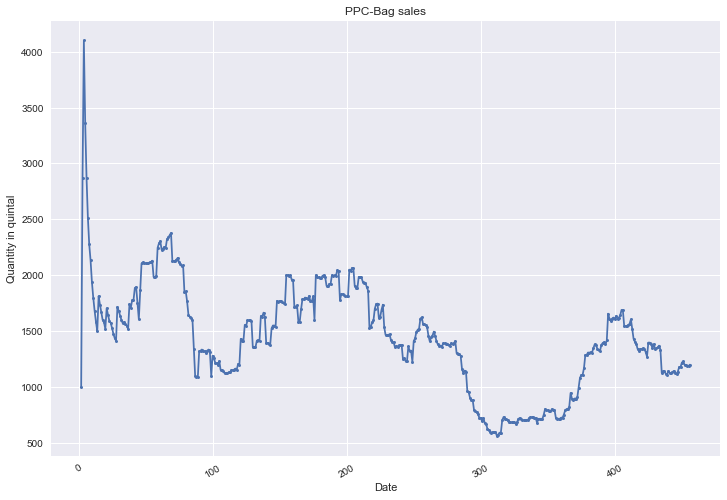

In [5]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(df['Date'], df['Quantity In Quintal'], '-o', markersize=3, label='true')
plt.xticks(rotation=30)
plt.xlabel('Date')
plt.ylabel('Quantity in quintal')
plt.title('PPC-Bag sales')
plt.show()

### Preparing input data from Quantity In Quintal for time series forcasting 

In [6]:
df['Quintal_LastDay']=df['Quantity In Quintal'].shift(+1)
df['Quintal_2Dayssback']=df['Quantity In Quintal'].shift(+2)
df['Quintal_3Dayssback']=df['Quantity In Quintal'].shift(+3)
df['Quintal_4Dayssback']=df['Quantity In Quintal'].shift(+4)
df['Quintal_5Dayssback']=df['Quantity In Quintal'].shift(+5)
df['Quintal_6Dayssback']=df['Quantity In Quintal'].shift(+6)
df['Quintal_7Dayssback']=df['Quantity In Quintal'].shift(+7)
df.head(10)

,Date,Quantity In Quintal,Quintal_LastDay,Quintal_2Dayssback,Quintal_3Dayssback,Quintal_4Dayssback,Quintal_5Dayssback,Quintal_6Dayssback,Quintal_7Dayssback
0,2.0,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,2866.666667,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,4100.000000,2866.666667,1000.000000,NaN,NaN,NaN,NaN,NaN
3,5.0,3360.000000,4100.000000,2866.666667,1000.000000,NaN,NaN,NaN,NaN
4,6.0,2866.666667,3360.000000,4100.000000,2866.666667,1000.000000,NaN,NaN,NaN
5,7.0,2514.285714,2866.666667,3360.000000,4100.000000,2866.666667,1000.000000,NaN,NaN
6,8.0,2275.000000,2514.285714,2866.666667,3360.000000,4100.000000,2866.666667,1000.000000,NaN
7,9.0,2133.333333,2275.000000,2514.285714,2866.666667,3360.000000,4100.000000,2866.666667,1000.000000
8,10.0,1940.000000,2133.333333,2275.000000,2514.285714,2866.666667,3360.000000,4100.000000,2866.666667
9,11.0,1800.000000,1940.000000,2133.333333,2275.000000,2514.285714,2866.666667,3360.000000,4100.000000


In [7]:
df=df.dropna()
df.head(10)

,Date,Quantity In Quintal,Quintal_LastDay,Quintal_2Dayssback,Quintal_3Dayssback,Quintal_4Dayssback,Quintal_5Dayssback,Quintal_6Dayssback,Quintal_7Dayssback
7,9.0,2133.333333,2275.000000,2514.285714,2866.666667,3360.000000,4100.000000,2866.666667,1000.000000
8,10.0,1940.000000,2133.333333,2275.000000,2514.285714,2866.666667,3360.000000,4100.000000,2866.666667
9,11.0,1800.000000,1940.000000,2133.333333,2275.000000,2514.285714,2866.666667,3360.000000,4100.000000
10,12.0,1683.333333,1800.000000,1940.000000,2133.333333,2275.000000,2514.285714,2866.666667,3360.000000
11,13.0,1584.615385,1683.333333,1800.000000,1940.000000,2133.333333,2275.000000,2514.285714,2866.666667
12,14.0,1500.000000,1584.615385,1683.333333,1800.000000,1940.000000,2133.333333,2275.000000,2514.285714
13,15.0,1813.333333,1500.000000,1584.615385,1683.333333,1800.000000,1940.000000,2133.333333,2275.000000
14,16.0,1737.500000,1813.333333,1500.000000,1584.615385,1683.333333,1800.000000,1940.000000,2133.333333
15,17.0,1670.588235,1737.500000,1813.333333,1500.000000,1584.615385,1683.333333,1800.000000,1940.000000
16,18.0,1600.000000,1670.588235,1737.500000,1813.333333,1500.000000,1584.615385,1683.333333,1800.000000


In [8]:
x1,x2,x3,x4,x5,x6,x7,y=df['Quintal_LastDay'],df['Quintal_2Dayssback'],df['Quintal_3Dayssback'],df['Quintal_4Dayssback'],df['Quintal_5Dayssback'],df['Quintal_6Dayssback'],df['Quintal_7Dayssback'],df['Quantity In Quintal']
x1,x2,x3,x4,x5,x6,x7,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(y)
x1,x2,x3,x4,x5,x6,x7,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7),axis=1)
print(final_x)


[[2275.       2514.285714 2866.666667 ... 4100.       2866.666667
  1000.      ]
 [2133.333333 2275.       2514.285714 ... 3360.       4100.
  2866.666667]
 [1940.       2133.333333 2275.       ... 2866.666667 3360.
  4100.      ]
 ...
 [1198.425    1198.425    1228.425    ... 1178.425    1178.425
  1138.425   ]
 [1188.425    1198.425    1198.425    ... 1218.425    1178.425
  1178.425   ]
 [1188.425    1188.425    1198.425    ... 1228.425    1218.425
  1178.425   ]]


### Spliting data for Train and Test

In [9]:
train_size = int(len(final_x) * 0.80)
X_train,X_test,y_train,y_test=final_x[:train_size],final_x[train_size:],y[:train_size],y[train_size:]

### Build Model

In [10]:
lr = linear_regression(w_intercept=True)
lr.fit(X_train,y_train)

<ipython-input-2-47ba32f31464>:63: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):


### Making Prediction

<ipython-input-2-47ba32f31464>:63: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):


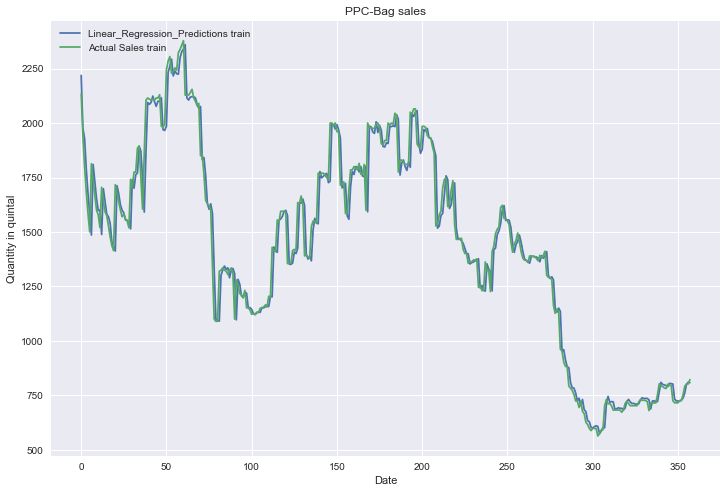

In [11]:
pred_train=lr.predict(X_train)

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred_train,label='Linear_Regression_Predictions train')
plt.plot(y_train,label='Actual Sales train')
plt.xlabel('Date')
plt.ylabel('Quantity in quintal')
plt.title('PPC-Bag sales')
plt.legend(loc="upper left")
plt.show()

<ipython-input-2-47ba32f31464>:63: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):


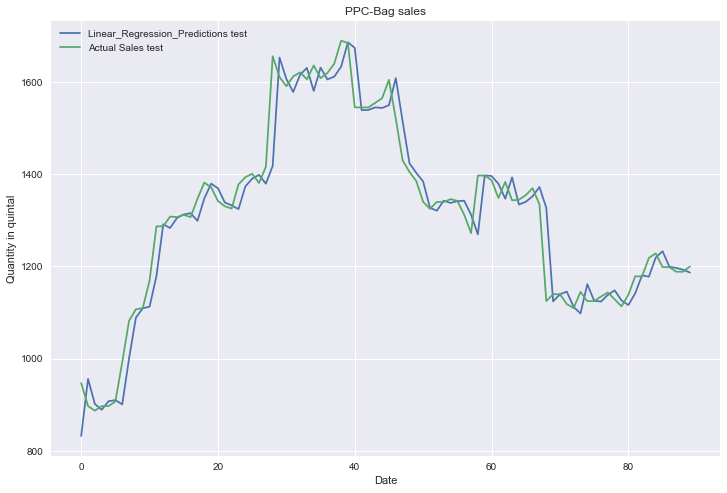

In [12]:
pred=lr.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Linear_Regression_Predictions test')
plt.plot(y_test,label='Actual Sales test')
plt.xlabel('Date')
plt.ylabel('Quantity in quintal')
plt.title('PPC-Bag sales')

plt.legend(loc="upper left")
plt.show()

### Calculating Mean Squared Error for linear regresssion

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))

In [14]:
print('Mean Squared Error for linear regresssion Model is:',rmse_rf)

Mean Squared Error for linear regresssion Model is: 51.76708532073758


In [15]:
# calculate manually
d = y_test - pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)


Results by manual calculation:
MAE: 32.08604695730673
MSE: 2679.831122604524
RMSE: 51.76708532073758
